<a href="https://colab.research.google.com/github/kartiknarayansahoo/deep_learning_specialization/blob/main/deep%20learning%20for%20audio/4_preprocessing_audio_data_for_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt

file = "blues.00000.wav"

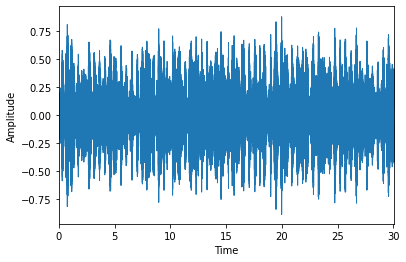

In [4]:
# waveform
signal, sr = librosa.load(file, sr=22050) # sr*Time = 22050*30  
librosa.display.waveplot(signal, sr=sr, )
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
signal.shape

(661794,)

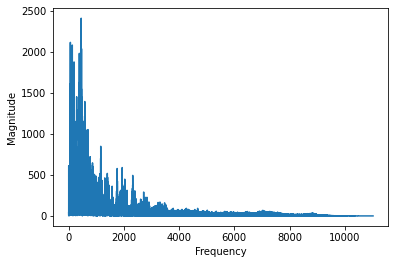

In [8]:
# fft (fast fourier transform)-> spectrun
import numpy as np

fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

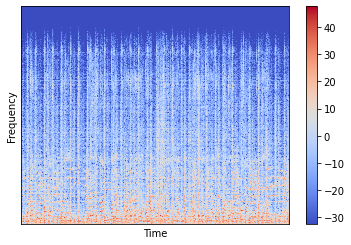

<Figure size 1008x648 with 0 Axes>

In [16]:
# stft (short time fourier transform) -> spectogram

n_fft = 2048
hop_length = 512 # the individual frequency range in which the sampling is done

stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length,)
spectogram = np.abs(stft) # does not consider the amplitude as logarithmic

log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length,)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar() # shows the magnitude
plt.figure(figsize=(14, 9))
plt.show()


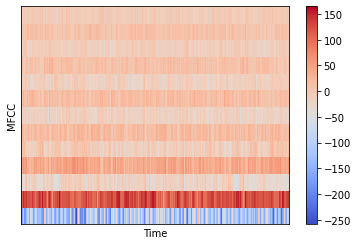

<Figure size 1008x648 with 0 Axes>

In [17]:
# MFCCs (Mel-frequency cepstral coefficients) store the timbre/quality of the sound

MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length = hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar() # shows the magnitude
plt.figure(figsize=(14, 9))
plt.show()